# Project 5 - Advertisement Budget Using Linear Regression

## 23AIML064 - Aarya Shah

### Goal - The goal of this project is to predict sales based on advertisement budgets using linear regression.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [107]:
df = pd.read_csv("D:\\Data Sets\\Advertising Budget and Sales.csv")
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [109]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [110]:
df['TV'] = df['TV Ad Budget ($)']
df['Radio'] = df['Radio Ad Budget ($)']
df['Newspaper'] = df['Newspaper Ad Budget ($)']
df['Sales'] = df['Sales ($)']
df.drop(columns=['Unnamed: 0','TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],inplace = True)

In [111]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Exploratory Data Analysis

<Axes: xlabel='TV', ylabel='Sales'>

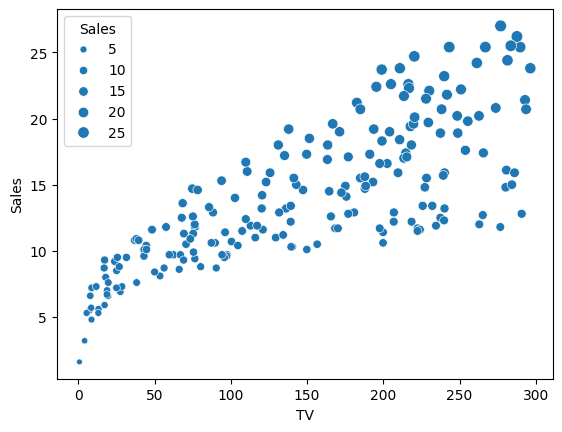

In [112]:
sns.scatterplot(x='TV', y='Sales', data=df, size = 'Sales', legend=True)

<Axes: xlabel='Radio', ylabel='Sales'>

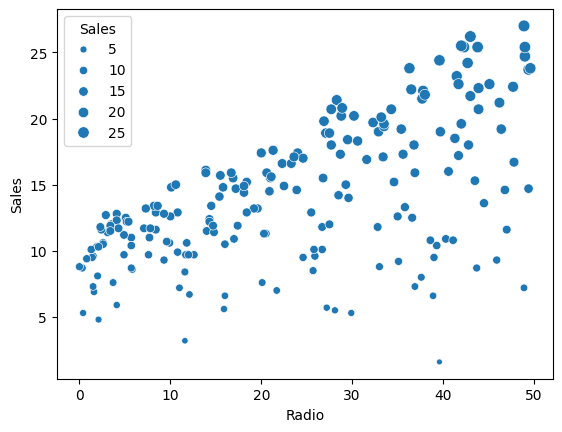

In [113]:
sns.scatterplot(x='Radio', y='Sales', data=df, size = 'Sales', legend=True)

<Axes: xlabel='Newspaper', ylabel='Sales'>

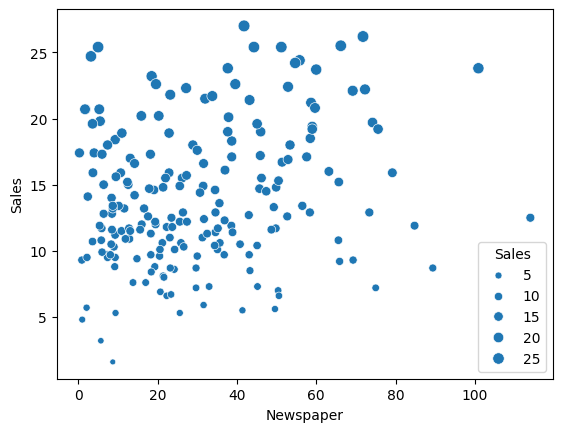

In [114]:
sns.scatterplot(x='Newspaper', y='Sales', data=df, size = 'Sales', legend=True)

In [115]:
# get boxplot and histogram

def visual(col, plot_title=None):
    plt.figure(figsize=(12, 5))

    hist_title = f"Histogram of {plot_title}" if plot_title else "Histogram"
    box_title = f"Boxplot of {plot_title}" if plot_title else "Boxplot"

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(col, bins=20, color="skyblue", edgecolor="black")
    plt.title(hist_title)

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(col, vert=False)
    plt.title(box_title)

    plt.tight_layout()
    plt.show()

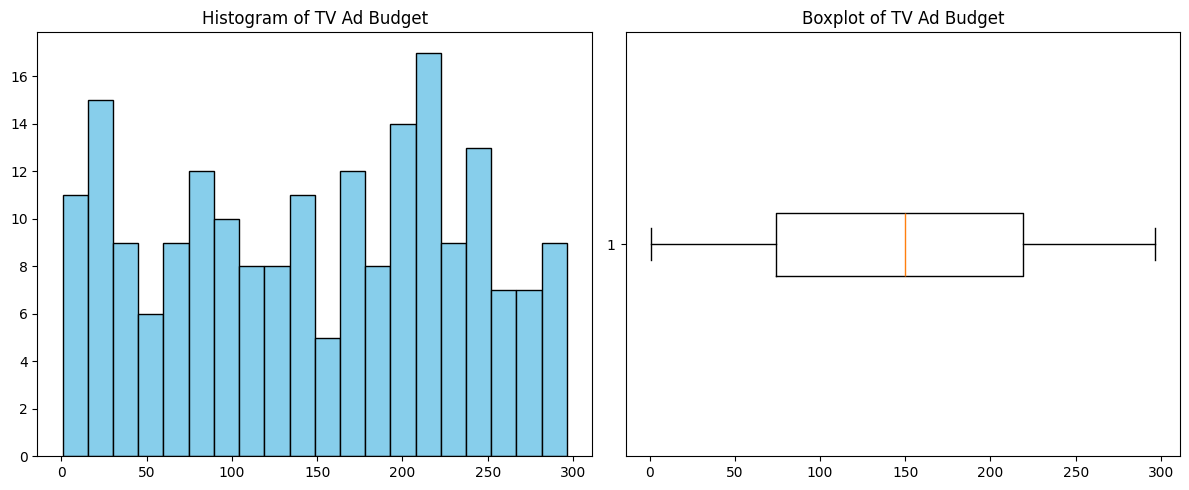

In [116]:
visual(df["TV"], "TV Ad Budget")

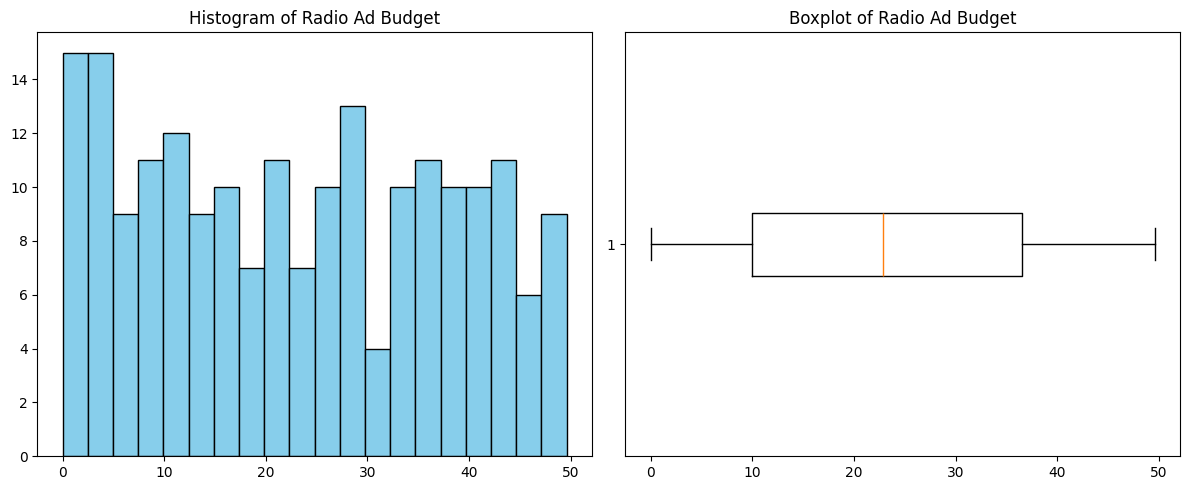

In [117]:
visual(df["Radio"], "Radio Ad Budget")

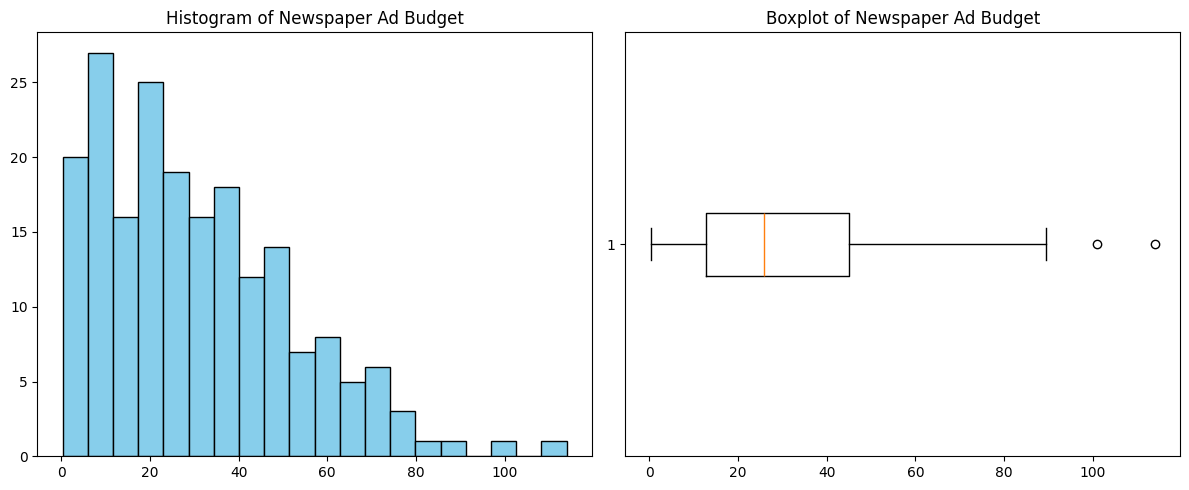

In [118]:
visual(df["Newspaper"], "Newspaper Ad Budget")

Conclusion - From the above visuals, only Newspaper Ad Budget has outliers, rest are okay.

In [119]:
def remove_outliers_df(df):
    cleaned_df = df.copy(deep=True)

    for col in df.select_dtypes(include="number").columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_df = cleaned_df[
            (cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)
        ]

    return cleaned_df

In [120]:
df_cleaned = remove_outliers_df(df)
df_cleaned.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [121]:
df_cleaned.shape

(198, 4)

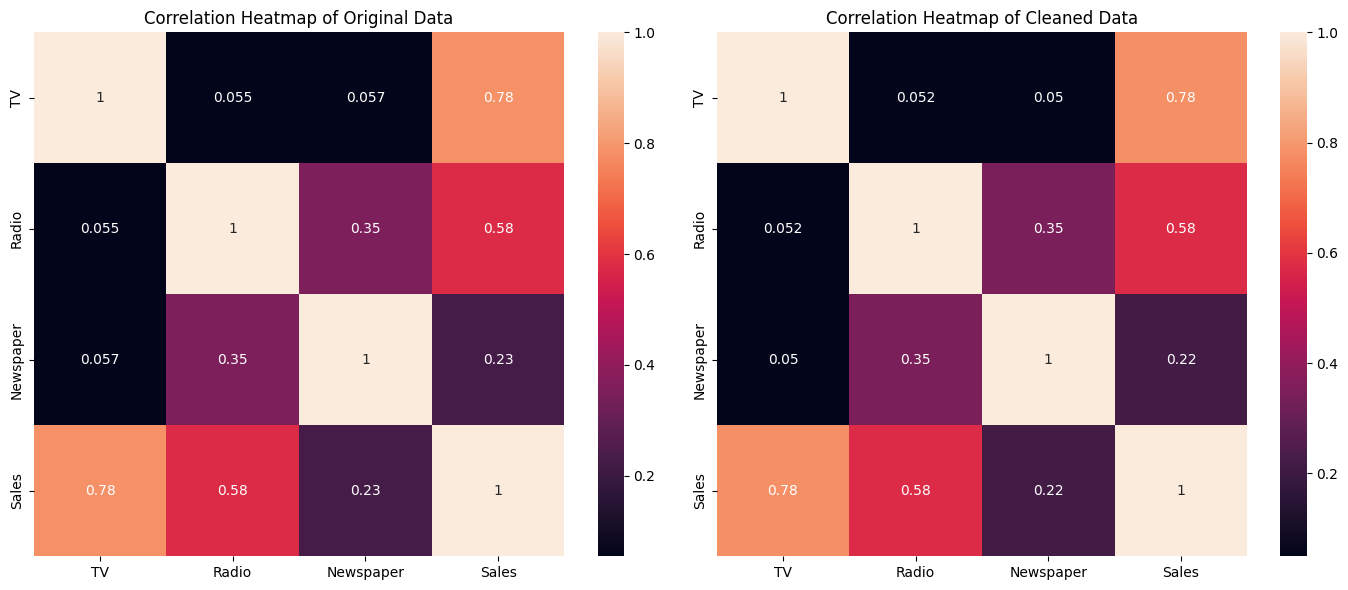

In [122]:
plt.figure(figsize=(14, 6))

# Heatmap for original data
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True,)
plt.title("Correlation Heatmap of Original Data")

# Heatmap for cleaned data
plt.subplot(1, 2, 2)
sns.heatmap(df_cleaned.corr(), annot=True)
plt.title("Correlation Heatmap of Cleaned Data")

plt.tight_layout()
plt.show()

Conclusion - From the heatmaps, even after removing outliers, the correlation is not affected much. Every name is correlated as well.

## Model Training

In [123]:
# Features and target variable

X = df_cleaned[['TV', 'Radio', 'Newspaper']]
y = df_cleaned['Sales']

In [124]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Initialize and train the Linear Regression model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = lr_model.predict(X_test)

In [127]:
r2_score(y_test, y_pred)

0.8989454779619588

In [132]:
mean_absolute_error(y_test, y_pred)

1.2497394075236383

In [134]:
mean_squared_error(y_test, y_pred)

2.7409119066899947

In [128]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
# Initialize and train the Linear Regression model with scaled data

lr_model_sc = LinearRegression()
lr_model_sc.fit(X_train_sc, y_train)
y_pred_sc = lr_model_sc.predict(X_test_sc)

In [130]:
r2_score(y_test, y_pred_sc)

0.8989454779619588

In [135]:
mean_absolute_error(y_test, y_pred_sc)

1.2497394075236388

In [136]:
mean_squared_error(y_test, y_pred_sc)

2.740911906689996

In [139]:
# Metrics for unscaled predictions

mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

# Metrics for scaled predictions

mae2 = mean_absolute_error(y_test, y_pred_sc)
mse2 = mean_squared_error(y_test, y_pred_sc)
r2_2 = r2_score(y_test, y_pred_sc)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2 Score'],
    'Before Scaling': [mae1, mse1, r2_1],
    'After Scaling': [mae2, mse2, r2_2]
})

print(metrics_df)

     Metric  Before Scaling  After Scaling
0       MAE        1.249739       1.249739
1       MSE        2.740912       2.740912
2  R2 Score        0.898945       0.898945


Conclusion - The table shows that scaling the features does not impact the model's performance metrics, as MAE, MSE, and R2 Score remain the same before and after scaling.

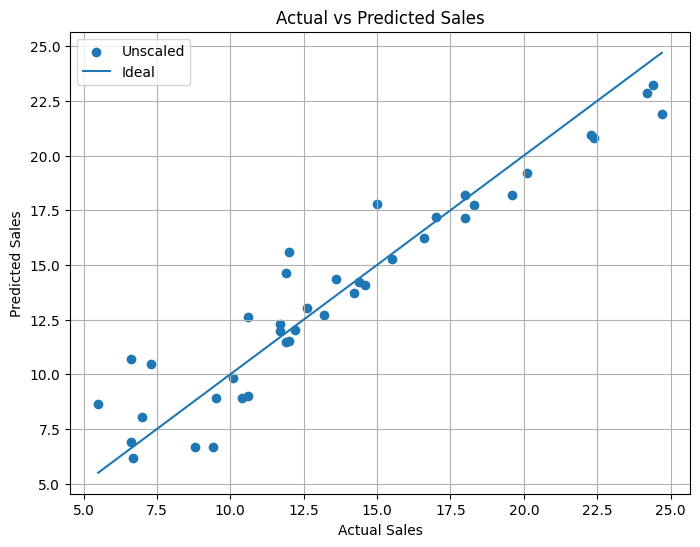

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Unscaled')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='Ideal')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

Conclusion - The scatter plot shows a positive correlation between advertisement budgets and sales, indicating that higher ad spending generally leads to increased sales.

# Conclusion

- In this project, we successfully built a linear regression model to predict sales based on advertisement budgets for TV, Radio, and Newspaper. 
- Through exploratory data analysis, we identified outliers and examined feature correlations. 
- After cleaning the data and removing outliers, we trained and evaluated the model both before and after feature scaling.
- The results showed that scaling did not significantly impact the model's performance, as indicated by similar MAE, MSE, and R² scores. 
- Overall, the model demonstrated a strong ability to predict sales, confirming that advertisement budgets, especially for TV and Radio, are strong predictors of sales outcomes. 
- This analysis provides valuable insights for optimizing advertisement spending to maximize sales.